# K-Means


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Genera conjunto de datos

In [2]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples = n_samples, random_state = random_state)

In [3]:
X.shape , y.shape

((1500, 2), (1500,))

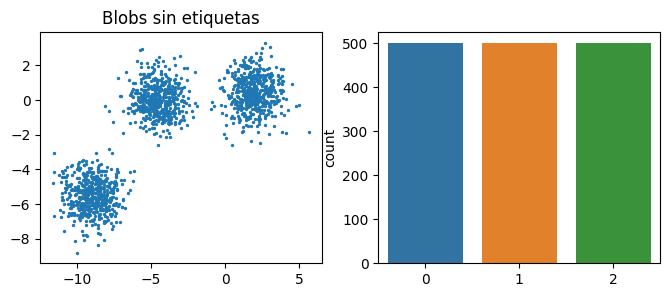

In [4]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs sin etiquetas")
plt.scatter(X[:,0], X[:,1], s=2)

plt.subplot(1,2,2)
sns.countplot(x = y)

plt.show()

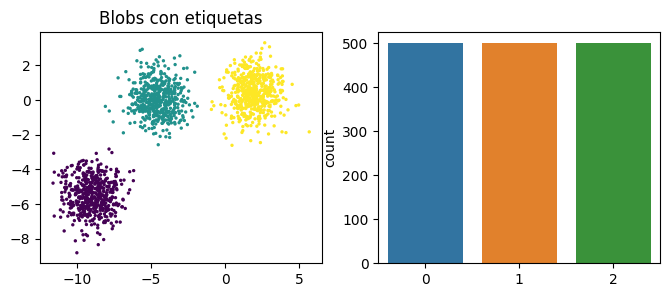

In [5]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs con etiquetas")
plt.scatter(X[:,0], X[:,1], s=2, c=y)

plt.subplot(1,2,2)
sns.countplot(x = y)

plt.show()

## Transformaciones para los Blobs

In [6]:
transf = [[0.6083, -0.6366], [-0.4088, 0.8525]]
transf

[[0.6083, -0.6366], [-0.4088, 0.8525]]

In [7]:
X_aniso = np.dot(X, transf)

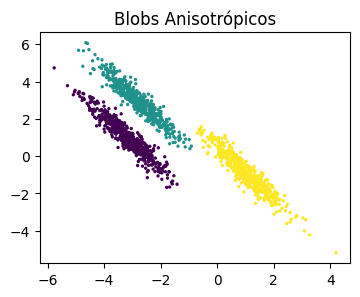

In [8]:
plt.figure(figsize=(4, 3))
plt.title("Blobs Anisotrópicos")
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=2, c=y)

plt.show()


Se cambia la dispersión de los datos

In [9]:
X_v , y_v = make_blobs(n_samples=n_samples,
                       random_state=random_state,
                       cluster_std=[1, 2.5, 0.5])

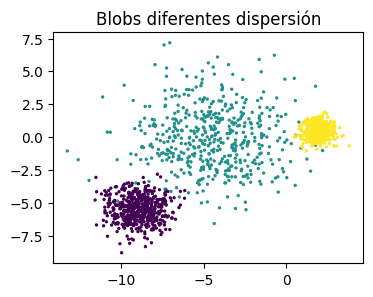

In [10]:
plt.figure(figsize=(4, 3))
plt.title("Blobs diferentes dispersión")
plt.scatter(X_v[:,0], X_v[:,1], s=2, c=y_v)

plt.show()


Se toma una parte de los datos originales, cambiando la cantidad de puntos para cada blob

In [11]:
X_filtro = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtro = [0]*500 + [1]*100 + [2]*10

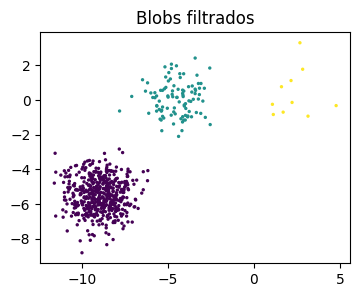

In [12]:
plt.figure(figsize=(4, 3))
plt.title("Blobs filtrados")
plt.scatter(X_filtro[:,0], X_filtro[:,1], s=2, c=y_filtro)

plt.show()

## Detección de clusters

In [13]:
from sklearn.cluster import KMeans

In [14]:
common_params = {"n_init":"auto", "random_state":random_state}

In [15]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)

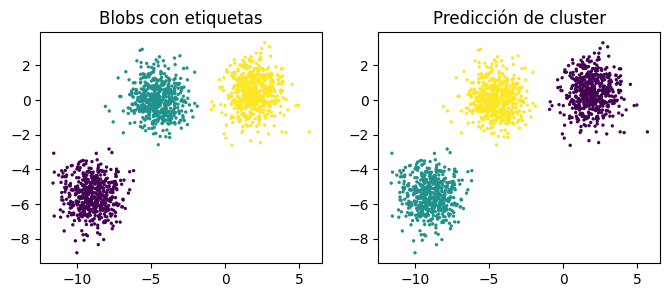

In [16]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs con etiquetas")
plt.scatter(X[:,0], X[:,1], s=2, c=y)

plt.subplot(1,2,2)
plt.title("Predicción de cluster")
plt.scatter(X[:,0], X[:,1], s=2, c=y_pred)

plt.show()

### Anisotrópicos

In [17]:
y_pred_aniso = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)

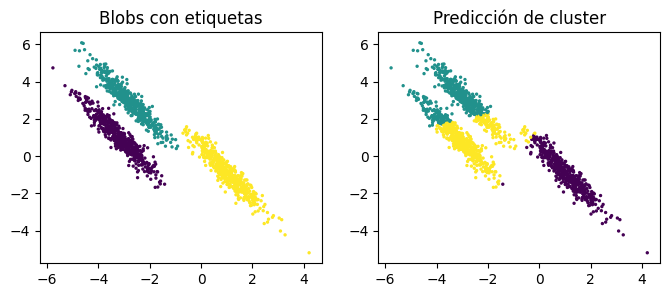

In [18]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs con etiquetas")
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=2, c=y)

plt.subplot(1,2,2)
plt.title("Predicción de cluster")
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=2, c=y_pred_aniso)

plt.show()

In [19]:
y_pred_v = KMeans(n_clusters=3, **common_params).fit_predict(X_v)

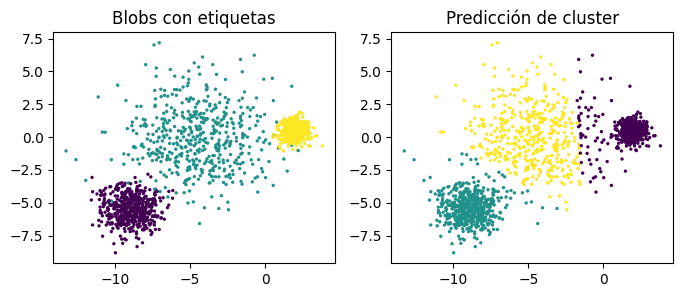

In [20]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs con etiquetas")
plt.scatter(X_v[:,0], X_v[:,1], s=2, c=y)

plt.subplot(1,2,2)
plt.title("Predicción de cluster")
plt.scatter(X_v[:,0], X_v[:,1], s=2, c=y_pred_v)

plt.show()

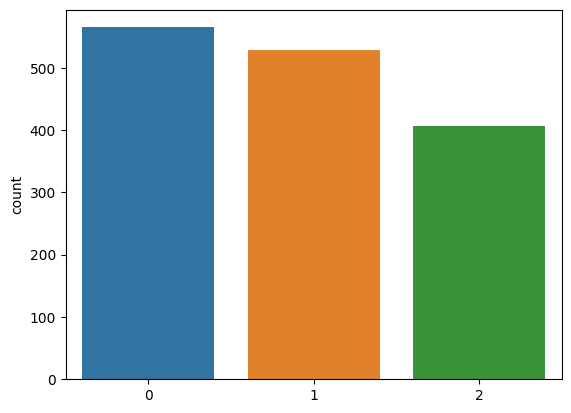

In [21]:
sns.countplot(x = y_pred_v)
plt.show()

Se pierde la uniformidad de la cantidad de los datos

Con diferentes cantidad de puntos

In [22]:
y_pred_filtro = KMeans(n_clusters=3, **common_params).fit_predict(X_filtro)

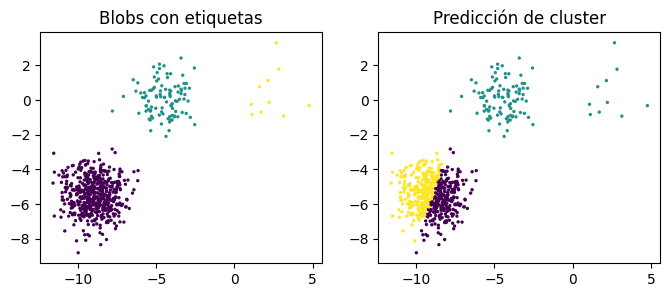

In [23]:
plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt.title("Blobs con etiquetas")
plt.scatter(X_filtro[:,0], X_filtro[:,1], s=2, c=y_filtro)

plt.subplot(1,2,2)
plt.title("Predicción de cluster")
plt.scatter(X_filtro[:,0], X_filtro[:,1], s=2, c=y_pred_filtro)

plt.show()

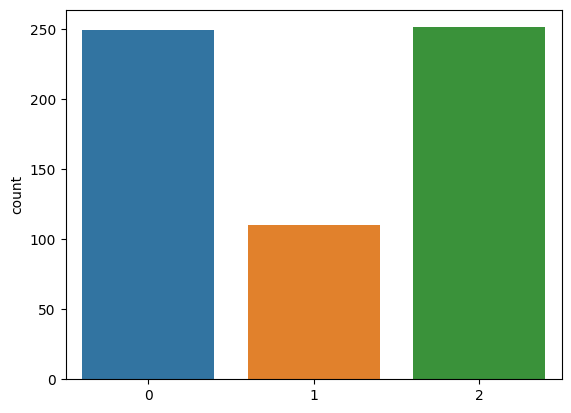

In [24]:
asns.countplot(x = y_pred_filtro)
plt.show()

**Inercia**: se define como la suma de distancias al cuadrado entre cada punto y su centroide mas cercano para todos los clusters; esta arbitrariamente al cuadrado pero lo unico que se requieres es que sea comparable.

In [25]:
kmeans = KMeans(n_clusters=3, **common_params)
kmeans.fit(X)
kmeans.inertia_

2862.7319140789587

In [29]:
inercias = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, **common_params)
  kmeans.fit(X)
  inercias.append(kmeans.inertia_)

In [30]:
inercias

[43533.29436635674,
 13264.032353355491,
 2862.7319140789587,
 2550.649993170621,
 2250.514502871323,
 1920.8601062837854,
 1722.707572148101,
 1713.524523750195,
 1408.5965361897113,
 1221.0813545026754]

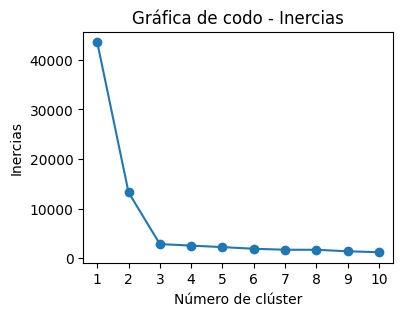

In [32]:
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), inercias, "o-")
plt.title("Gráfica de codo - Inercias")
plt.xlabel("Número de clúster")
plt.ylabel("Inercias")
plt.xticks(list(range(1, 11)))
plt.show()

**Silueta:** Mide la calidad de la agrupación.

$$\frac{b-a}{max(a,b)} $$

$a: $ Qué tan cercano está el objetivo de su propio clúster (Centroide).

$b: $ Qué tan cercano está un objeto al siguiente clúster más cercano.

La silueta toma valores entre $(-1, 1)$. A mayor valor, mejor agrupamiento.

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
siluetas = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, **common_params)
  kmeans.fit(X)
  siluetas.append(silhouette_score(X, kmeans.labels_))


In [40]:
siluetas

[0.6277375237710934,
 0.7333423486262539,
 0.5859894144689572,
 0.45324777877761724,
 0.30981754995604904,
 0.31905939402535544,
 0.4346227496882757,
 0.3183282361976107,
 0.32688978934016244]

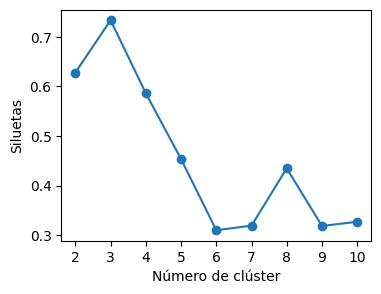

In [46]:
plt.figure(figsize=(4, 3))
plt.plot(range(2, 11), siluetas, "o-")

plt.xlabel("Número de clúster")
plt.ylabel("Siluetas")
plt.xticks(list(range(2, 11)))
plt.show()

------------------------------------------
